In [2]:
import yfinance as yf
import datetime
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [44]:

# Recuperamos datos históricos de BTC-ETH
start_date = datetime.datetime(2019, 1, 1)
end_date = datetime.datetime(2023,5,1)
btc_data = yf.download('BTC-USD', start=start_date, end=end_date)
eth_data = yf.download('ETH-USD',start=start_date,end=end_date)
# de los datos obtenidos tomamos los cierres de cada uno y los guardamos en un array de pandas
btc_data_close = np.array(btc_data['Close'],dtype=float)
eth_data_close = np.array(eth_data['Close'],dtype=float)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [55]:
# creamos una capa simple
hide_layer_1 = tf.keras.layers.Dense(units=10,input_shape=[1])
hide_layer_2 = tf.keras.layers.Dense(units=10)
results = tf.keras.layers.Dense(units=1)

# creamos el modelo
model = tf.keras.Sequential([hide_layer_1,hide_layer_2,results])
# compilamos el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(0.005),loss='mean_squared_error')
print("Comenzando entrenamiento...")
# entrenamos el modelo, con datos de entrada, los resultado esperados, los epochs que son las vueltas a hacer para ir ajustando el aprendizaje
# verbose igual a false para que no muestre todo lo que hace durante el aprendizaje
historial = model.fit(btc_data_close,eth_data_close,epochs=500,verbose=False)
print("modelo entrenado!!")

Comenzando entrenamiento...
modelo entrenado!!


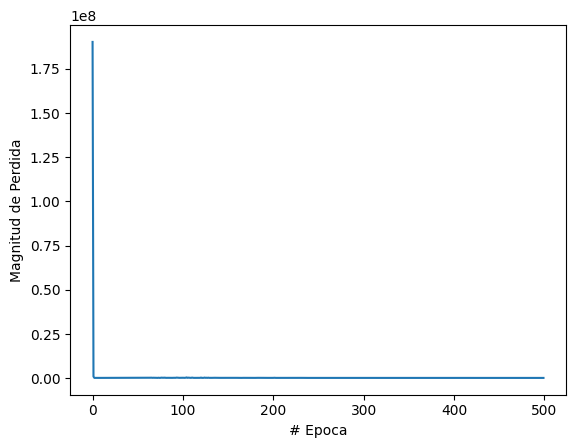

In [56]:

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de Perdida")
plt.plot(historial.history["loss"])

In [57]:
# test data => btc hoy
yesterday_date = datetime.datetime(2023, 4, 30)
btc_today = yf.download('BTC-USD',start=yesterday_date,end=end_date)
print(btc_today['Close'])
result = model.predict(btc_today['Close'].values)
print(result)

[*********************100%***********************]  1 of 1 completed
Date
2023-04-30    29268.806641
Name: Close, dtype: float64
1/1 [==============================] - 0s 91ms/step
[[1727.1614]]
